In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/yield_df (1).csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
  df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [ ]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [ ]:
df = df.drop(to_drop)

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

Graph Frequency vs Area

In [ ]:
len(df['Area'].unique())

101

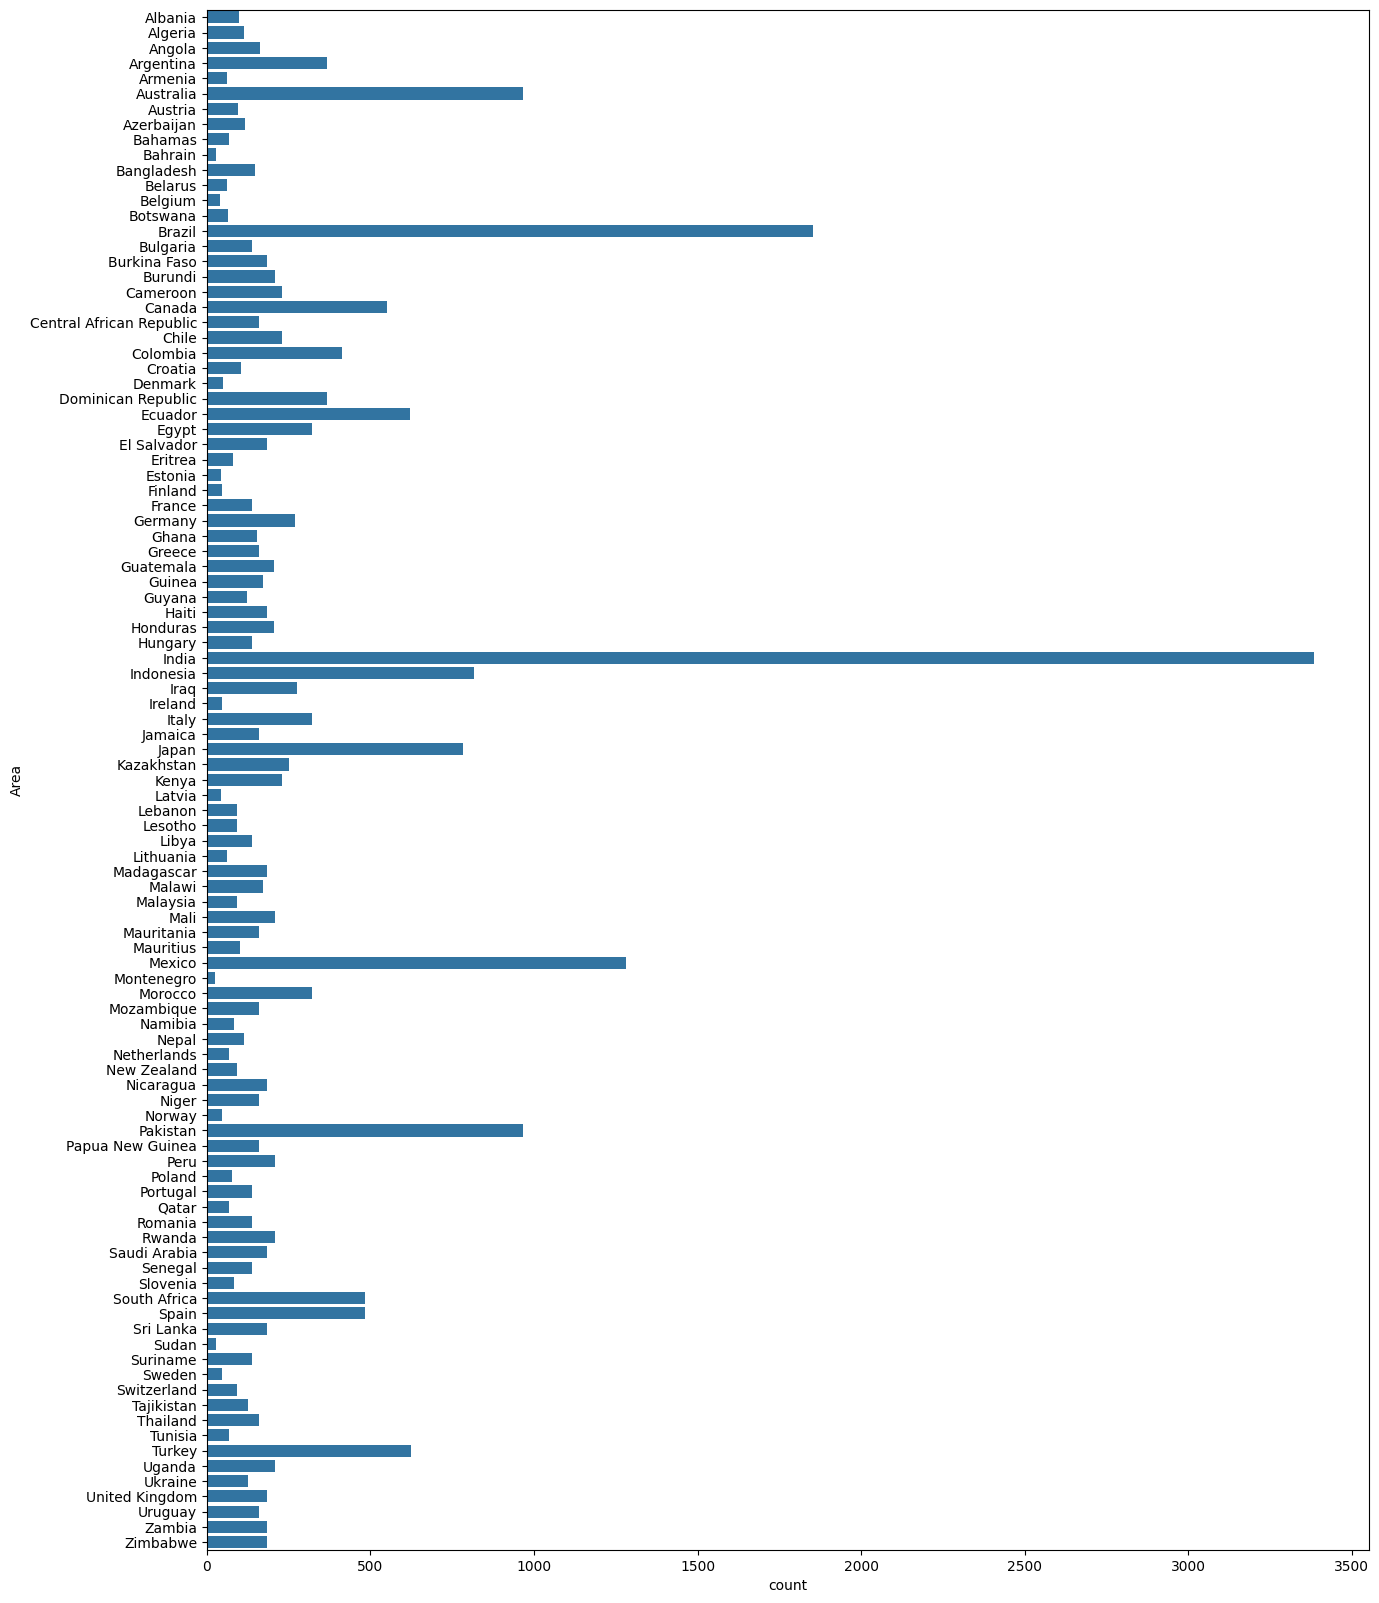

In [ ]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [ ]:
(df['Area'].value_counts() < 500).sum()

91

yield_per_country

In [ ]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [ ]:
df['hg/ha_yield'].sum()

1996196943

In [ ]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

Yield Per Country Graph

<Axes: >

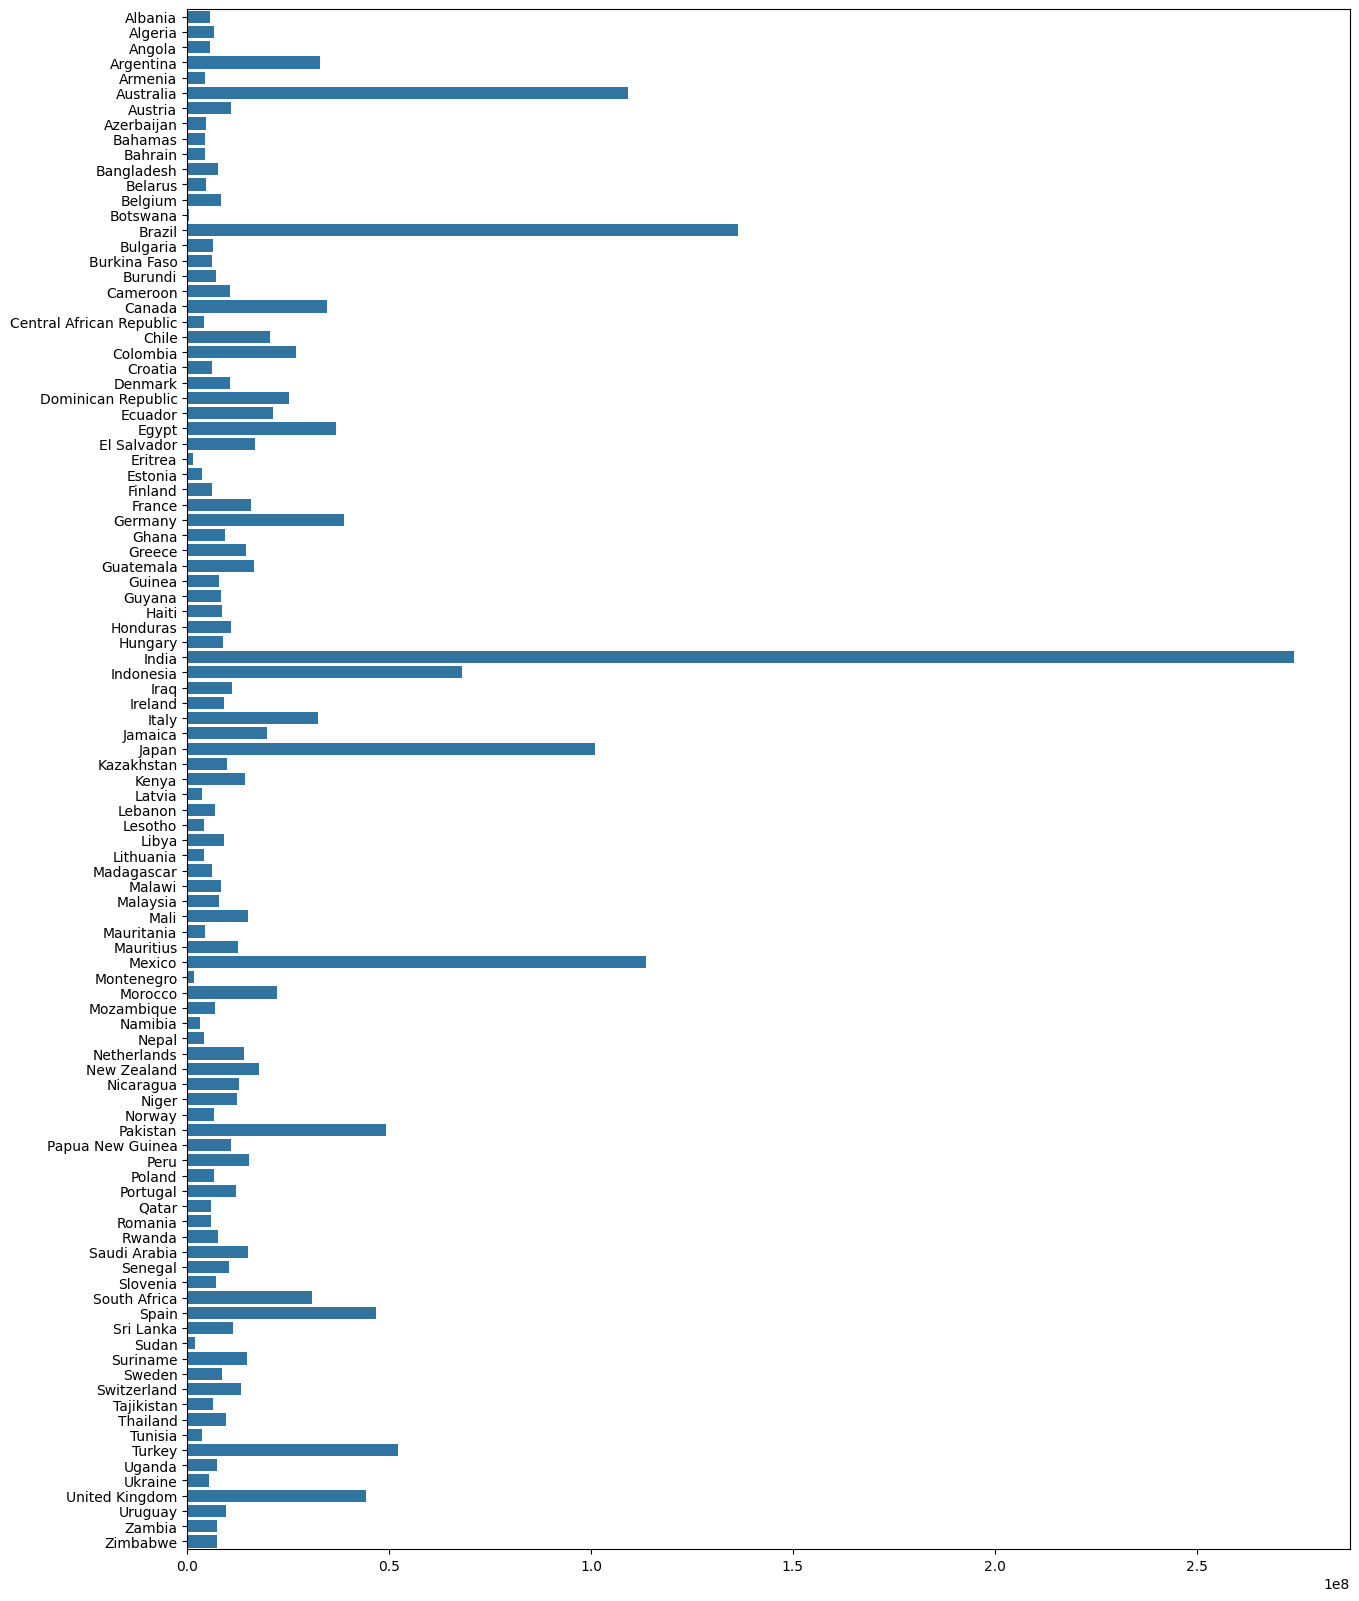

In [ ]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

Graph Frequency vs Item

<Axes: xlabel='count', ylabel='Item'>

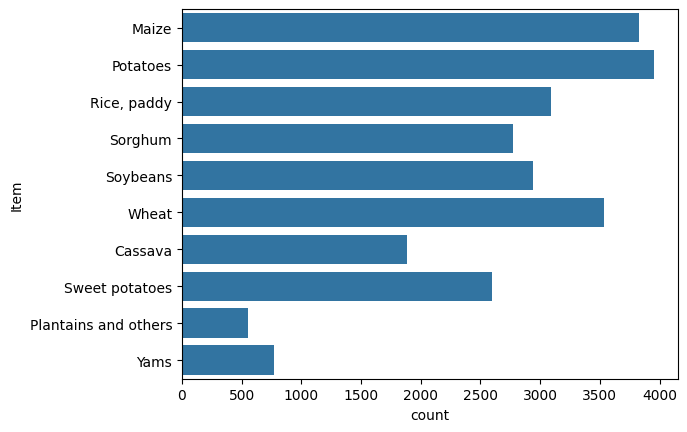

In [ ]:
sns.countplot(y=df['Item'])

Yield Vs Item

In [ ]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

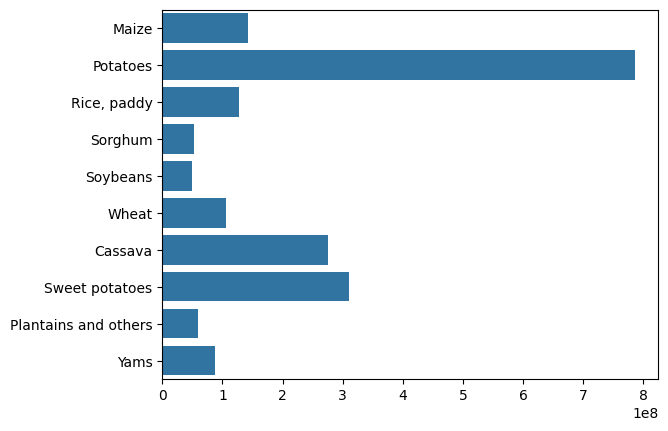

In [ ]:
sns.barplot(y=crops,x=yield_per_crop)


Train Test split Rearranging Columns

In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

Converting Categorical to Numerical and Scaling the values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

Let's train our model

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 29907.491754632363 score : 0.747312327961836


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss : mae : 29893.99762450549 score : 0.7473261756207235
Rid : mae : 29864.88758307408 score : 0.7473042337448462
Dtr : mae : 3932.4501638712163 score : 0.9798425569175072


Select model

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23035., 34879., 77391.])

Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
  result

array([36613.])

Pickle Files

In [ ]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.fig()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


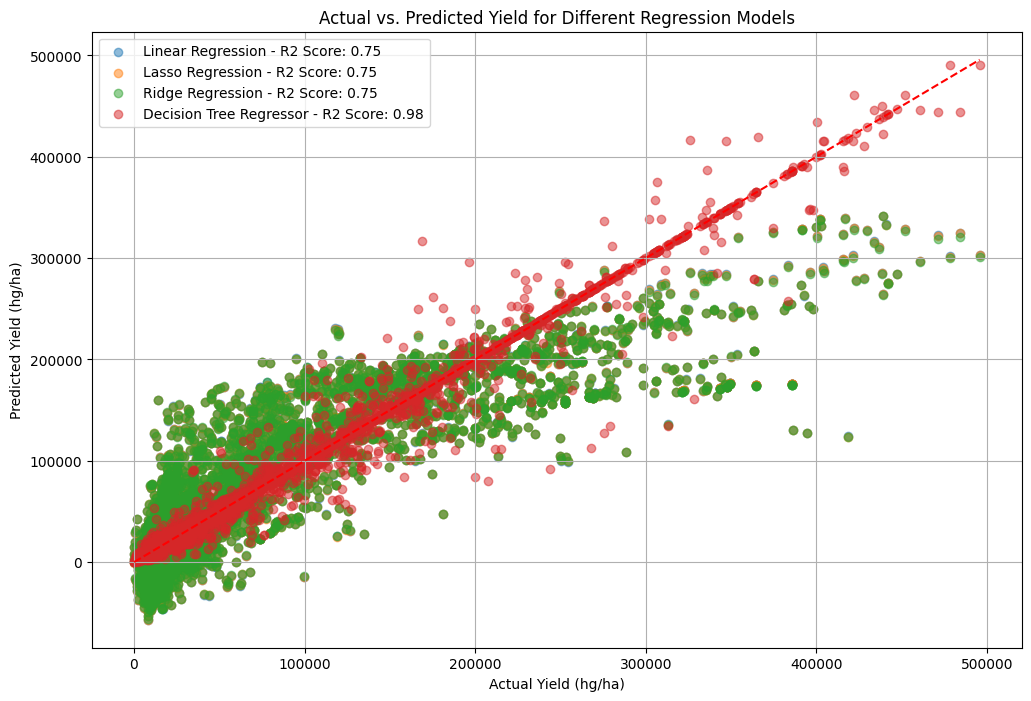

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    score = r2_score(y_test, y_pred)
    plt.scatter(y_test, y_pred, alpha=0.5, label=f'{name} - R2 Score: {score:.2f}')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield for Different Regression Models')
plt.legend()
plt.grid(True)
plt.show()


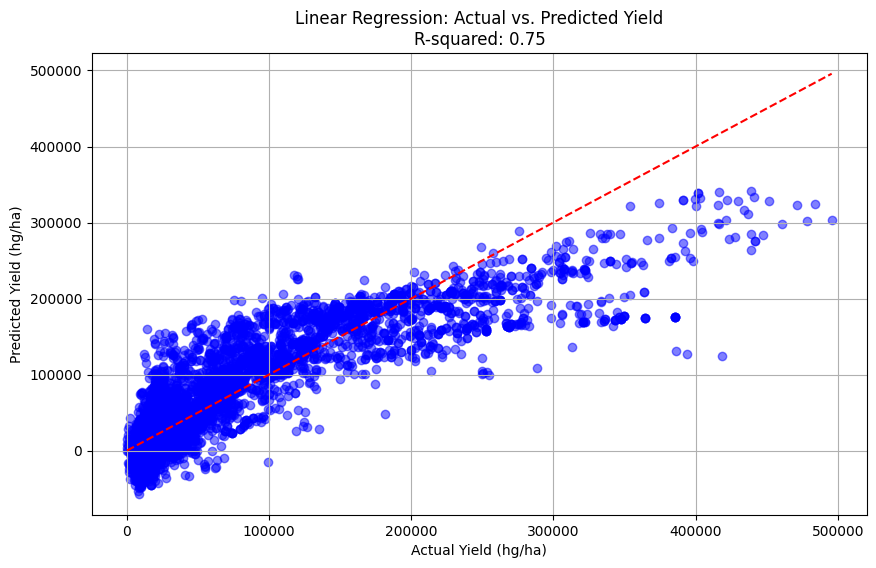

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)
y_pred_lr = lr.predict(X_test_dummy)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Linear Regression: Actual vs. Predicted Yield\nR-squared: {r2_lr:.2f}')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


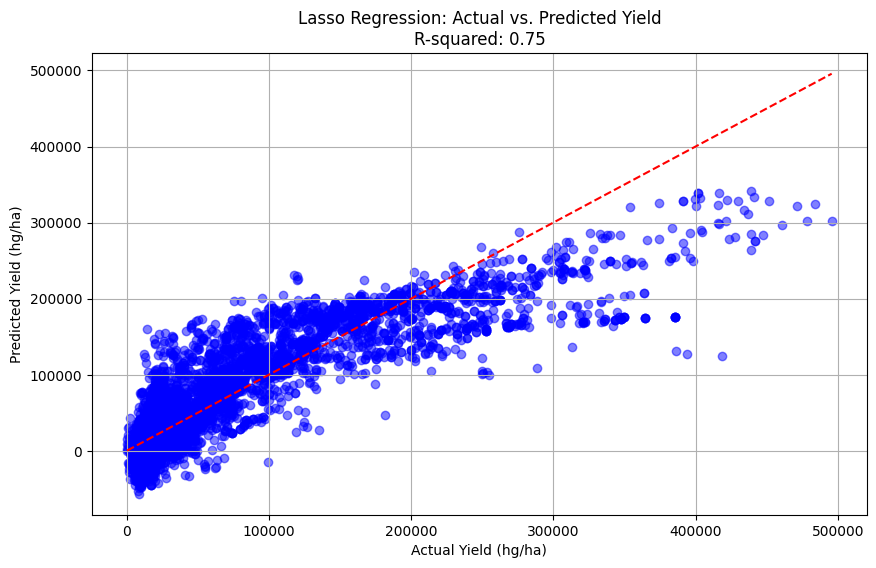

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Lasso Regression model
lasso = Lasso()
lasso.fit(X_train_dummy, y_train)
y_pred_lasso = lasso.predict(X_test_dummy)

# Calculate R-squared score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Lasso Regression: Actual vs. Predicted Yield\nR-squared: {r2_lasso:.2f}')
plt.grid(True)
plt.show()


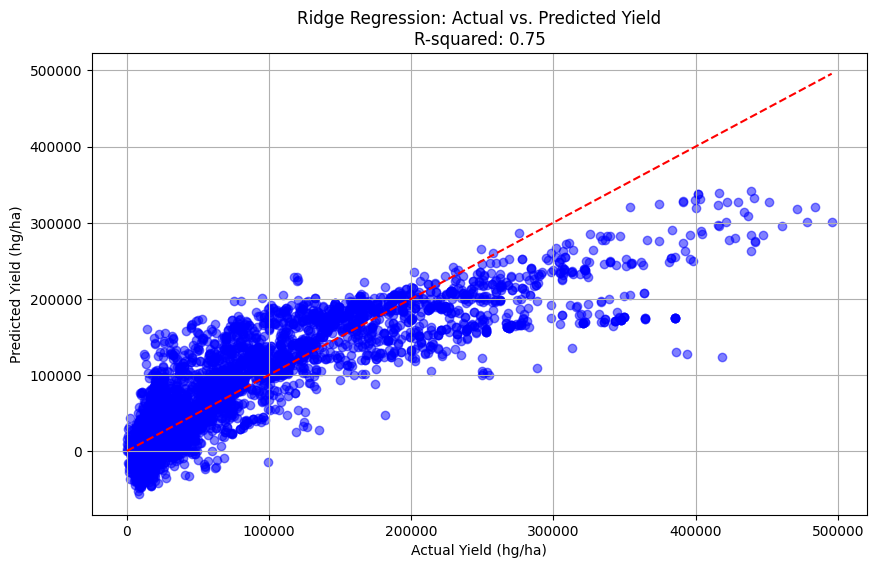

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Ridge Regression model
ridge = Ridge()
ridge.fit(X_train_dummy, y_train)
y_pred_ridge = ridge.predict(X_test_dummy)

# Calculate R-squared score
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Ridge Regression: Actual vs. Predicted Yield\nR-squared: {r2_ridge:.2f}')
plt.grid(True)
plt.show()


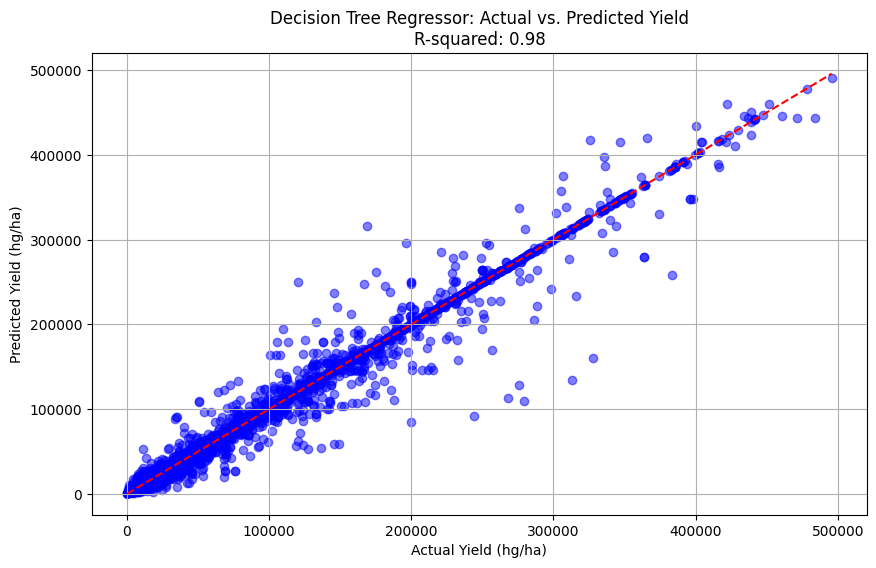

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
y_pred_dtr = dtr.predict(X_test_dummy)

# Calculate R-squared score
r2_dtr = r2_score(y_test, y_pred_dtr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Decision Tree Regressor: Actual vs. Predicted Yield\nR-squared: {r2_dtr:.2f}')
plt.grid(True)
plt.show()


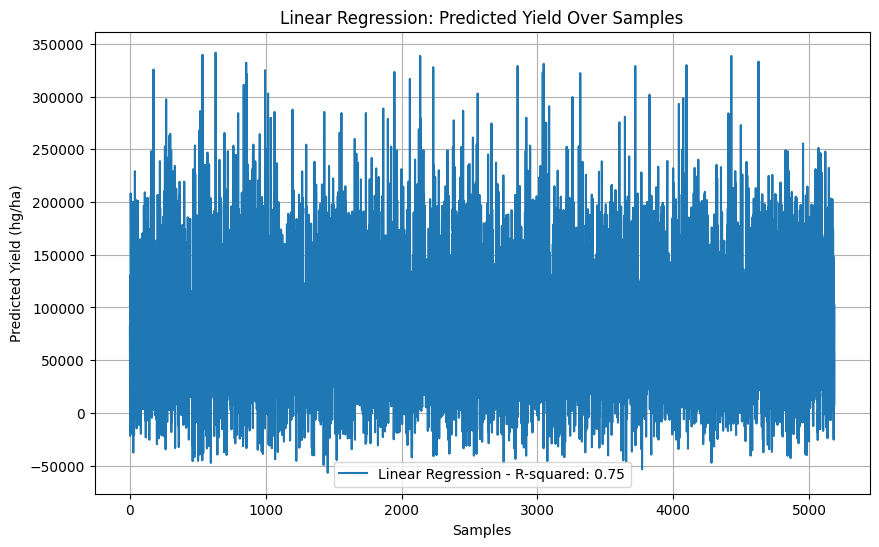

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)
y_pred_lr = lr.predict(X_test_dummy)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# Plotting R-squared score over years
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_pred_lr)), y_pred_lr, label=f'Linear Regression - R-squared: {r2_lr:.2f}')
plt.xlabel('Samples')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Linear Regression: Predicted Yield Over Samples')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


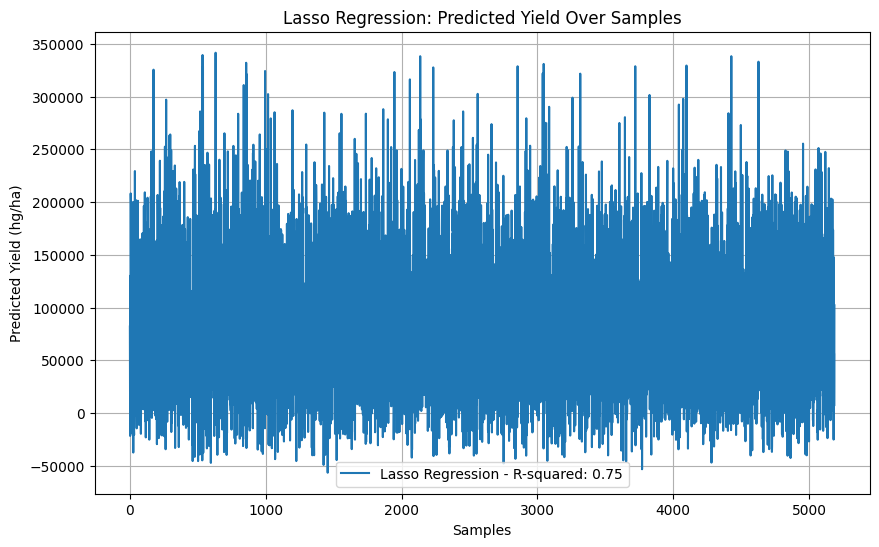

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Lasso Regression model
lasso = Lasso()
lasso.fit(X_train_dummy, y_train)
y_pred_lasso = lasso.predict(X_test_dummy)

# Calculate R-squared score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Plotting R-squared score over years
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_pred_lasso)), y_pred_lasso, label=f'Lasso Regression - R-squared: {r2_lasso:.2f}')
plt.xlabel('Samples')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Lasso Regression: Predicted Yield Over Samples')
plt.legend()
plt.grid(True)
plt.show()


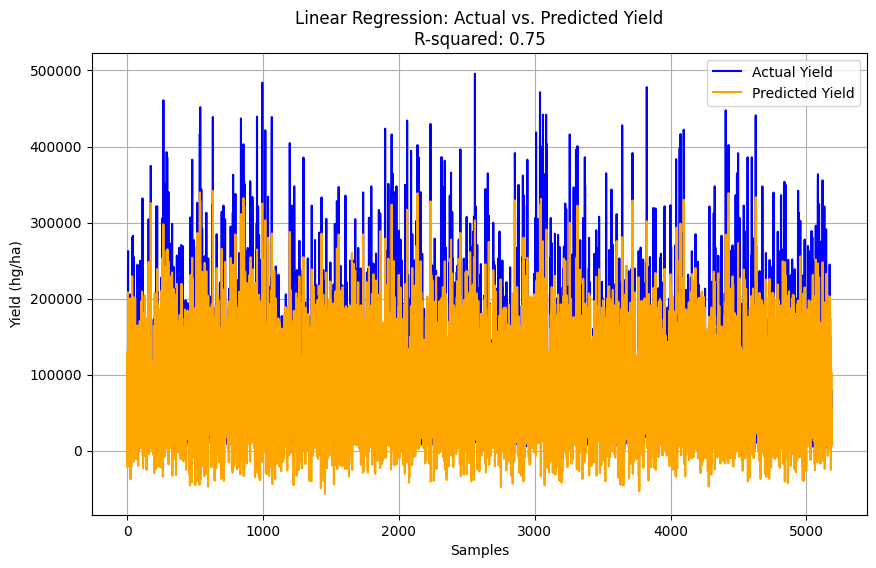

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)
y_pred_lr = lr.predict(X_test_dummy)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Yield', color='blue')
plt.plot(np.arange(len(y_pred_lr)), y_pred_lr, label='Predicted Yield', color='orange')
plt.xlabel('Samples')
plt.ylabel('Yield (hg/ha)')
plt.title(f'Linear Regression: Actual vs. Predicted Yield\nR-squared: {r2_lr:.2f}')
plt.legend()
plt.grid(True)
plt.show()


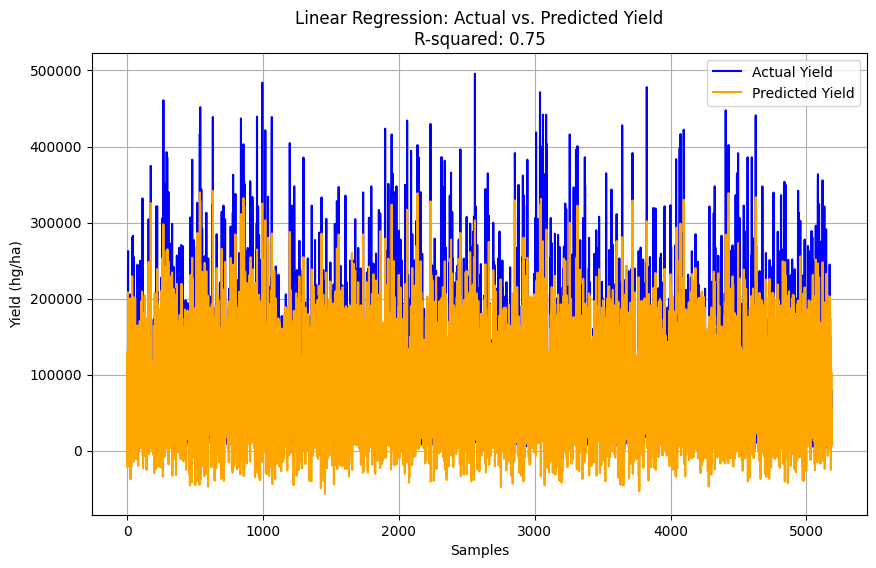

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)
y_pred_lr = lr.predict(X_test_dummy)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Yield', color='blue')
plt.plot(y_pred_lr, label='Predicted Yield', color='orange')
plt.xlabel('Samples')
plt.ylabel('Yield (hg/ha)')
plt.title(f'Linear Regression: Actual vs. Predicted Yield\nR-squared: {r2_lr:.2f}')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


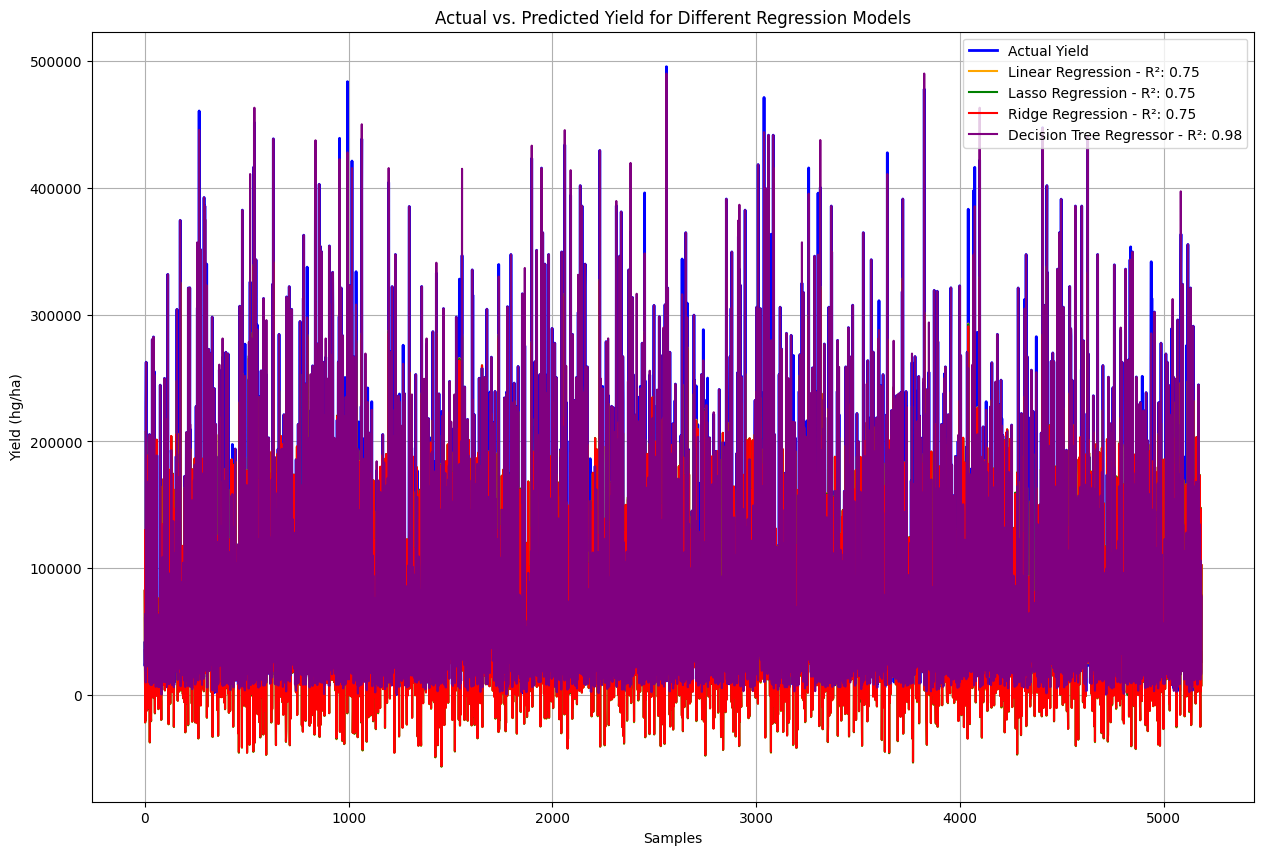

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Fit models and predict
predictions = {}
r2_scores = {}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    predictions[name] = y_pred
    r2_scores[name] = r2_score(y_test, y_pred)

# Plotting actual vs predicted yields for all models
plt.figure(figsize=(15, 10))
plt.plot(y_test.reset_index(drop=True), label='Actual Yield', color='blue', linewidth=2)

colors = ['orange', 'green', 'red', 'purple']
for (name, y_pred), color in zip(predictions.items(), colors):
    plt.plot(y_pred, label=f'{name} - R²: {r2_scores[name]:.2f}', color=color)

plt.xlabel('Samples')
plt.ylabel('Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield for Different Regression Models')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


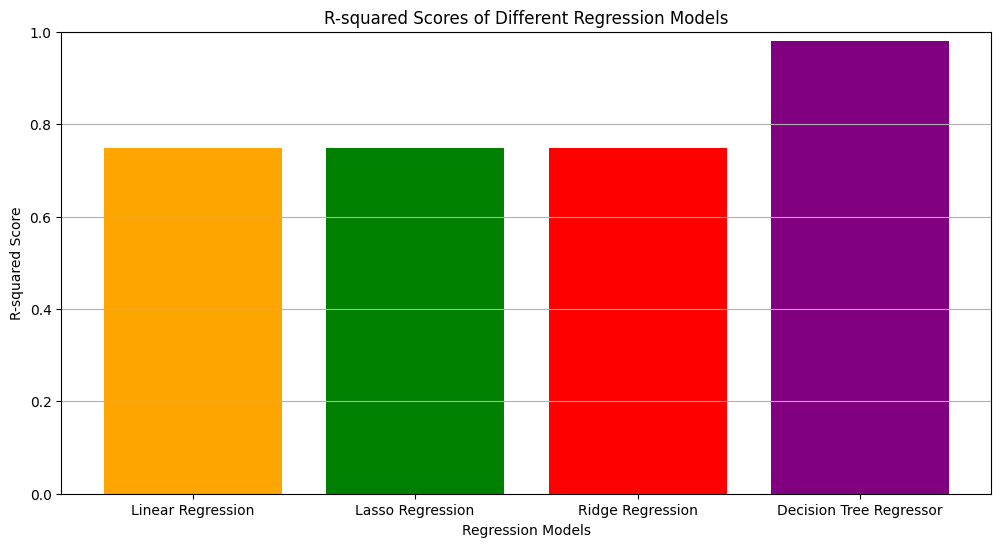

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Fit models and predict
r2_scores = {}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    r2_scores[name] = r2_score(y_test, y_pred)

# Create bar graph
plt.figure(figsize=(12, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['orange', 'green', 'red', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Regression Models')
plt.ylim(0, 1)  # Assuming R-squared values are between 0 and 1
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


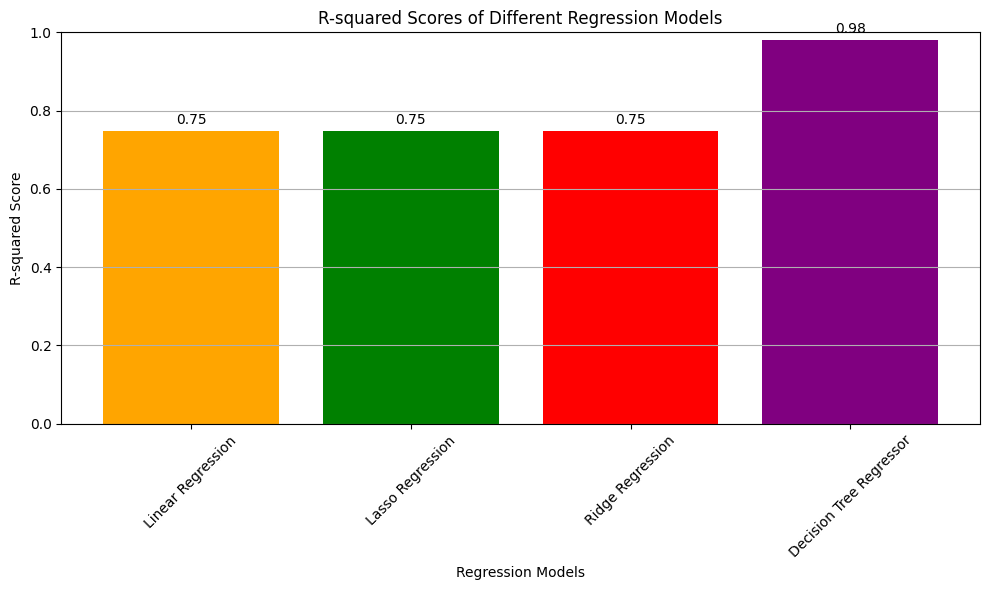

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Fit models and predict
r2_scores = {}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    r2_scores[name] = r2_score(y_test, y_pred)

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['orange', 'green', 'red', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Regression Models')
plt.ylim(0, 1)  # Assuming R-squared values are between 0 and 1
plt.grid(axis='y')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the value of each bar on top
for index, value in enumerate(r2_scores.values()):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


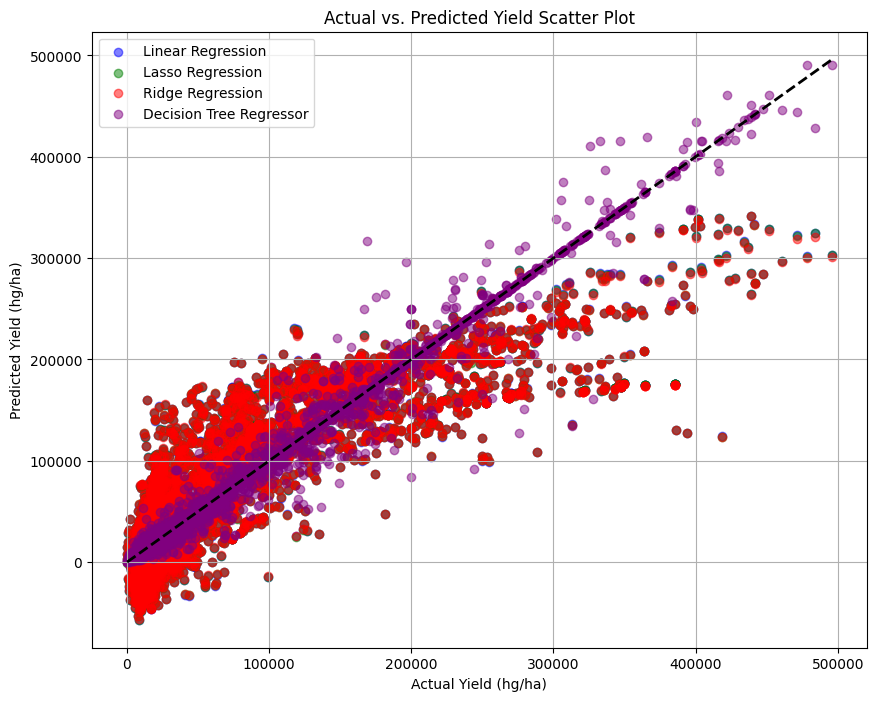

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Fit models and predict
predictions = {}
r2_scores = {}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    predictions[name] = y_pred
    r2_scores[name] = r2_score(y_test, y_pred)

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions['Linear Regression'], label='Linear Regression', color='blue', alpha=0.5)
plt.scatter(y_test, predictions['Lasso Regression'], label='Lasso Regression', color='green', alpha=0.5)
plt.scatter(y_test, predictions['Ridge Regression'], label='Ridge Regression', color='red', alpha=0.5)
plt.scatter(y_test, predictions['Decision Tree Regressor'], label='Decision Tree Regressor', color='purple', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Linear Regression R-squared: 0.75
Lasso Regression R-squared: 0.75
Ridge Regression R-squared: 0.75
Voting Regressor R-squared: 0.75


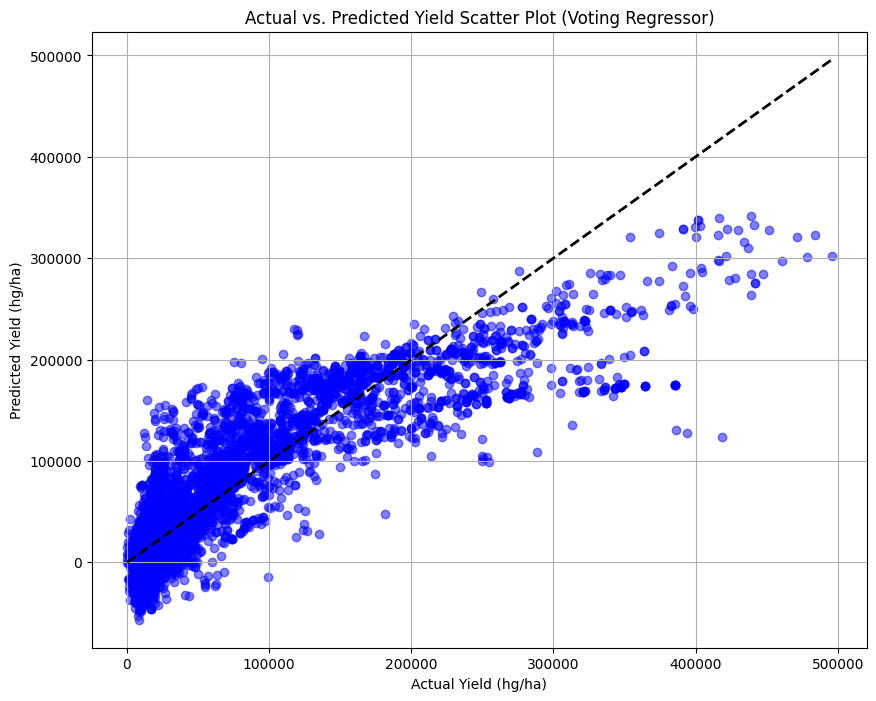

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# Fit models on training data
lr.fit(X_train_dummy, y_train)
lasso.fit(X_train_dummy, y_train)
ridge.fit(X_train_dummy, y_train)

# Predictions from individual models
y_pred_lr = lr.predict(X_test_dummy)
y_pred_lasso = lasso.predict(X_test_dummy)
y_pred_ridge = ridge.predict(X_test_dummy)

# Calculate R-squared scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('lasso', lasso),
    ('ridge', ridge)
])

# Fit Voting Regressor on training data
voting_regressor.fit(X_train_dummy, y_train)

# Predict with Voting Regressor
y_pred_voting = voting_regressor.predict(X_test_dummy)

# Calculate R-squared score for Voting Regressor
r2_voting = r2_score(y_test, y_pred_voting)

# Print R-squared scores for individual models
print(f"Linear Regression R-squared: {r2_lr:.2f}")
print(f"Lasso Regression R-squared: {r2_lasso:.2f}")
print(f"Ridge Regression R-squared: {r2_ridge:.2f}")
print(f"Voting Regressor R-squared: {r2_voting:.2f}")

# Plotting actual vs predicted yields for Voting Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_voting, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Voting Regressor)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


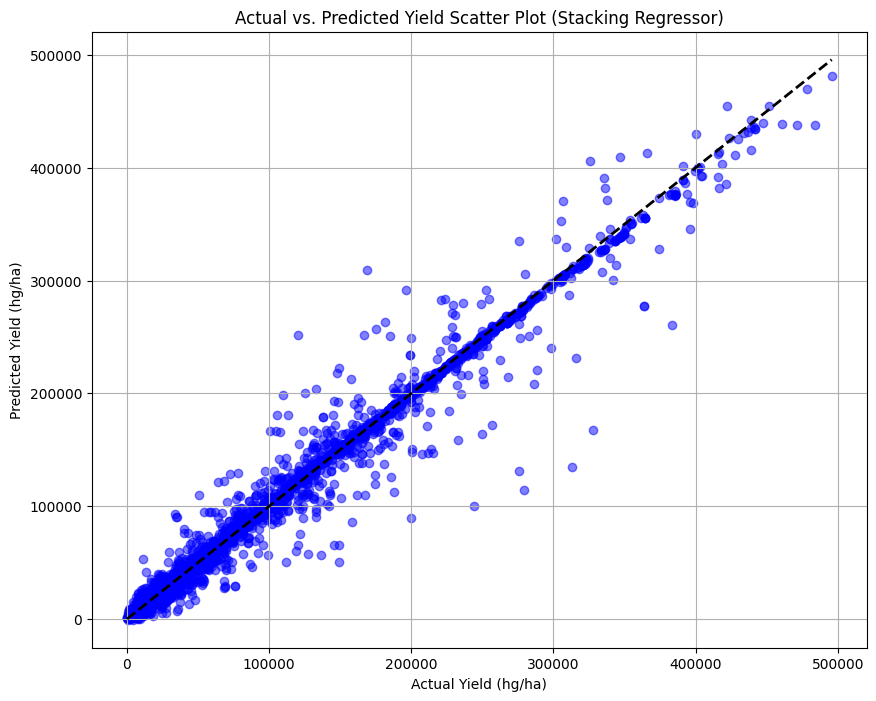

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)
A
# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Plotting actual vs predicted yields for Stacking Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


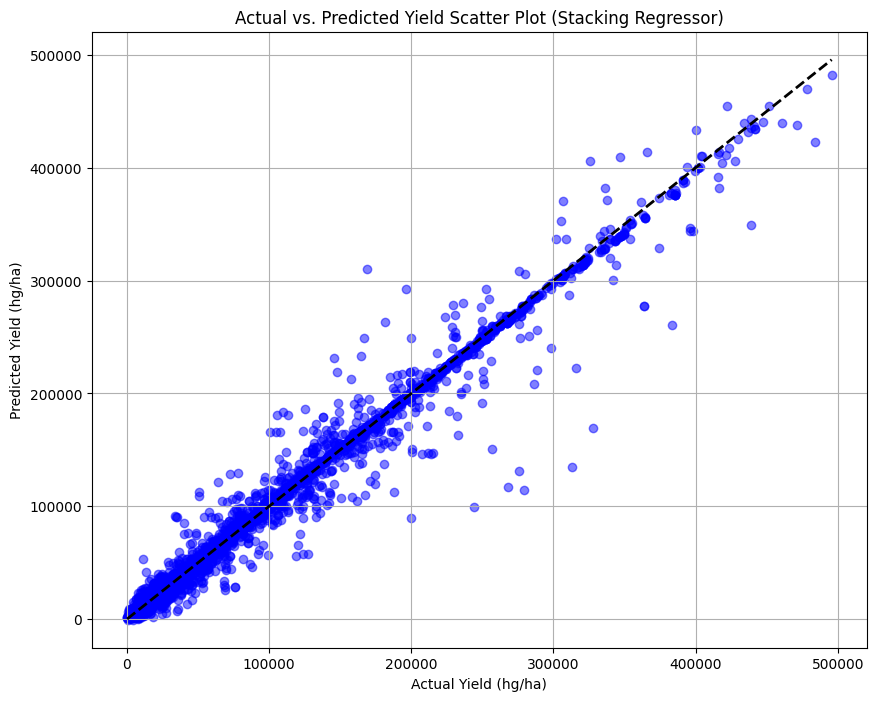

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Plotting actual vs predicted yields for Stacking Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


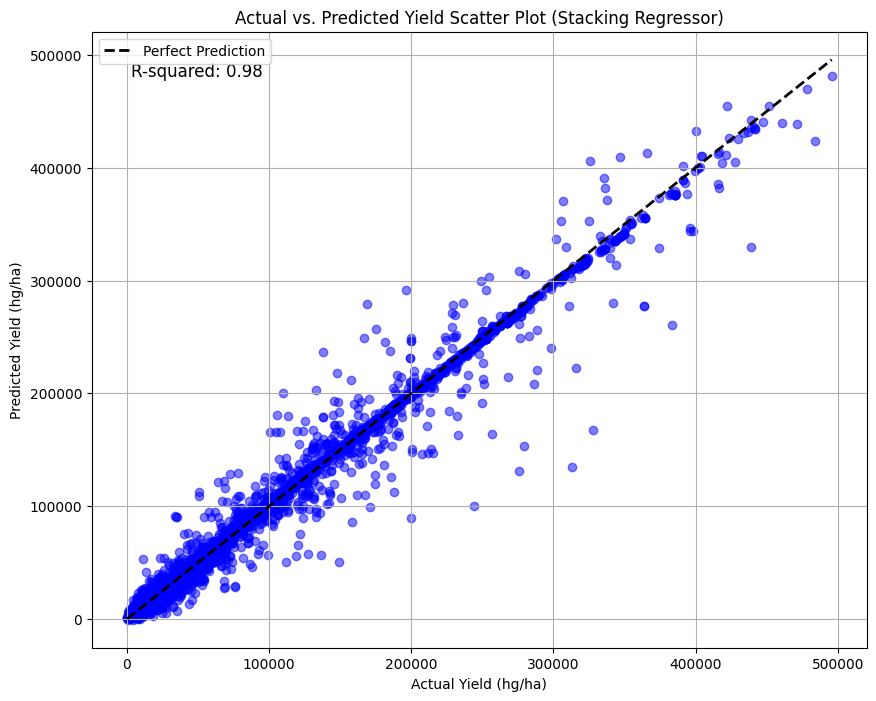

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Create scatter plot with accuracy information
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Add accuracy information as text on the plot
plt.text(0.05, 0.95, f'R-squared: {r2_stacking:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')

plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


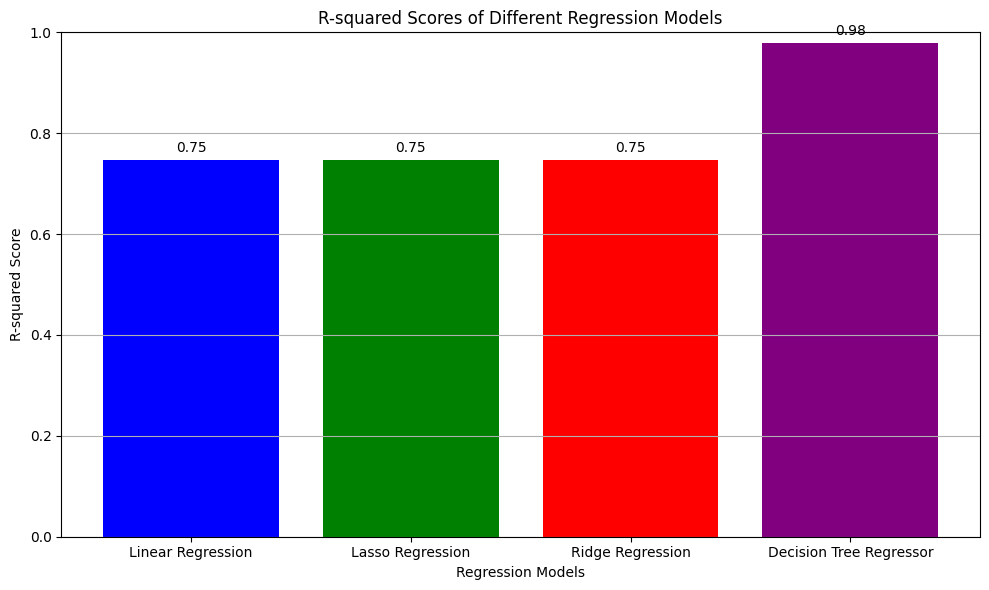

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Calculate R-squared scores for individual models
r2_scores = {}
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor']
for model_name, model in zip(models, [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor()]):
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    r2_scores[model_name] = r2_score(y_test, y_pred)

# Plotting R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Regression Models')
plt.ylim(0, 1)  # Assuming R-squared values are between 0 and 1
plt.grid(axis='y')

# Display the value of each bar on top
for index, value in enumerate(r2_scores.values()):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize base models and stacking regressor as before

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate evaluation metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print evaluation metrics for stacking regressor
print(f"Stacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking:.2f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.2f}")
print(f"R-squared Score: {r2_stacking:.2f}")

# Optionally, you can print metrics for individual models as well
# for model_name, model in zip(models, [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor()]):
#     model.fit(X_train_dummy, y_train)
#     y_pred = model.predict(X_test_dummy)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     print(f"{model_name} Metrics:")
#     print(f"Mean Absolute Error (MAE): {mae:.2f}")
#     print(f"Mean Squared Error (MSE): {mse:.2f}")
#     print(f"R-squared Score: {r2:.2f}")

# Since confusion matrix is not applicable for regression tasks, no code is provided for it.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor Metrics:
Mean Absolute Error (MAE): 4856.70
Mean Squared Error (MSE): 140837376.81
R-squared Score: 0.98


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit stacking regressor on training data (already done in previous code)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate evaluation metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print evaluation metrics for stacking regressor
print(f"Stacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking:.2f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.2f}")
print(f"R-squared Score: {r2_stacking:.2f}")


Stacking Regressor Metrics:
Mean Absolute Error (MAE): 4856.70
Mean Squared Error (MSE): 140837376.81
R-squared Score: 0.98


In [ ]:
Sfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print evaluation metrics for stacking regressor
print(f"Stacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking:.2f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.2f}")
print(f"R-squared Score: {r2_stacking:.2f}")


Stacking Regressor Metrics:
Mean Absolute Error (MAE): 4856.70
Mean Squared Error (MSE): 140837376.81
R-squared Score: 0.98


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit stacking regressor on training data (already done in previous code)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate evaluation metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print evaluation metrics for stacking regressor
print(f"Stacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking:.2f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.2f}")
print(f"R-squared Score: {r2_stacking:.2f}")


Stacking Regressor Metrics:
Mean Absolute Error (MAE): 4856.70
Mean Squared Error (MSE): 140837376.81
R-squared Score: 0.98


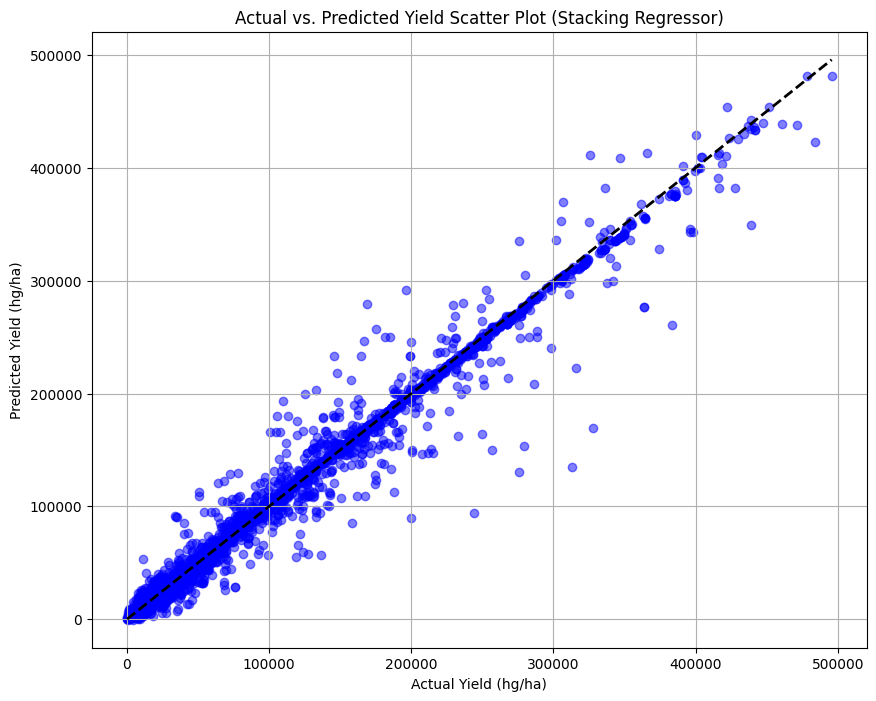

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted yields for Stacking Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.grid(True)
plt.show()


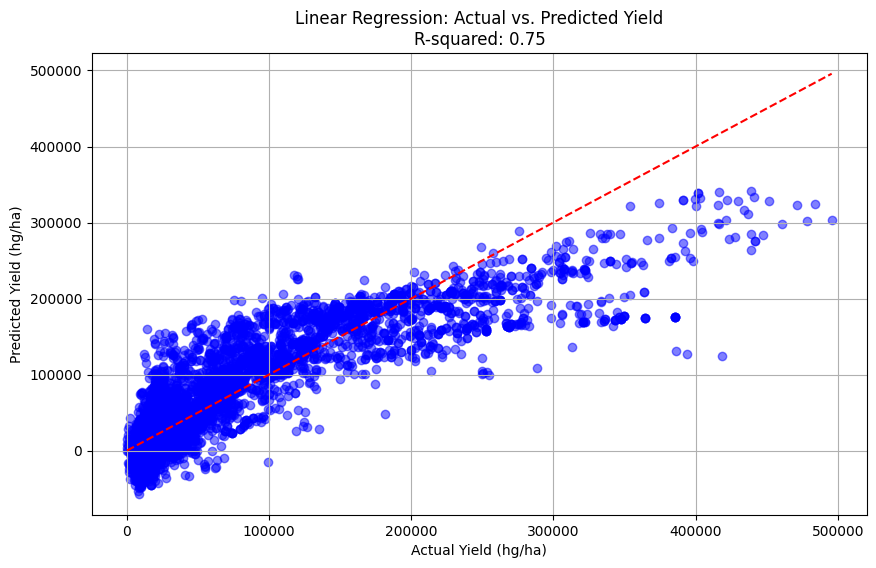

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_dummy, y_train)
y_pred_lr = lr.predict(X_test_dummy)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Linear Regression: Actual vs. Predicted Yield\nR-squared: {r2_lr:.2f}')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


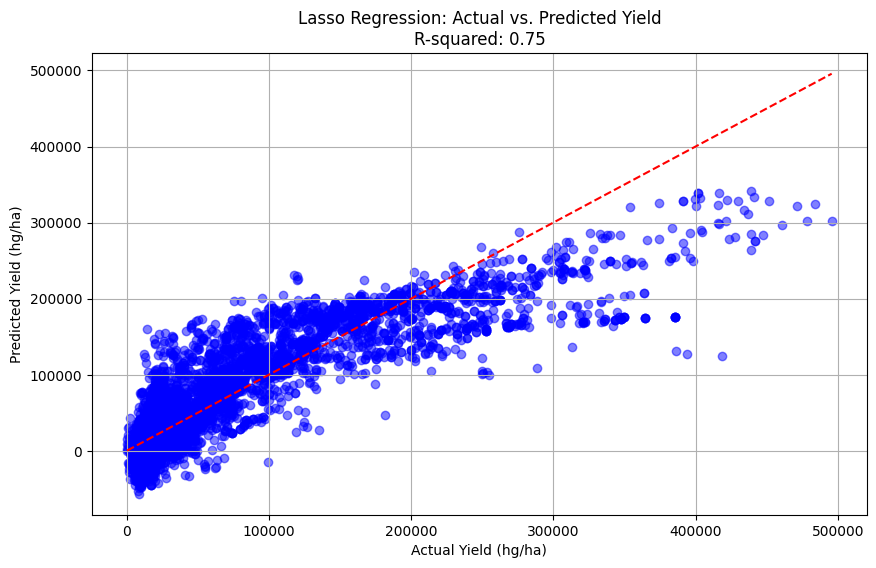

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Lasso Regression model
lasso = Lasso()
lasso.fit(X_train_dummy, y_train)
y_pred_lasso = lasso.predict(X_test_dummy)

# Calculate R-squared score
r2_lasso = r2_score(y_test, y_pred_lasso)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Lasso Regression: Actual vs. Predicted Yield\nR-squared: {r2_lasso:.2f}')
plt.grid(True)
plt.show()


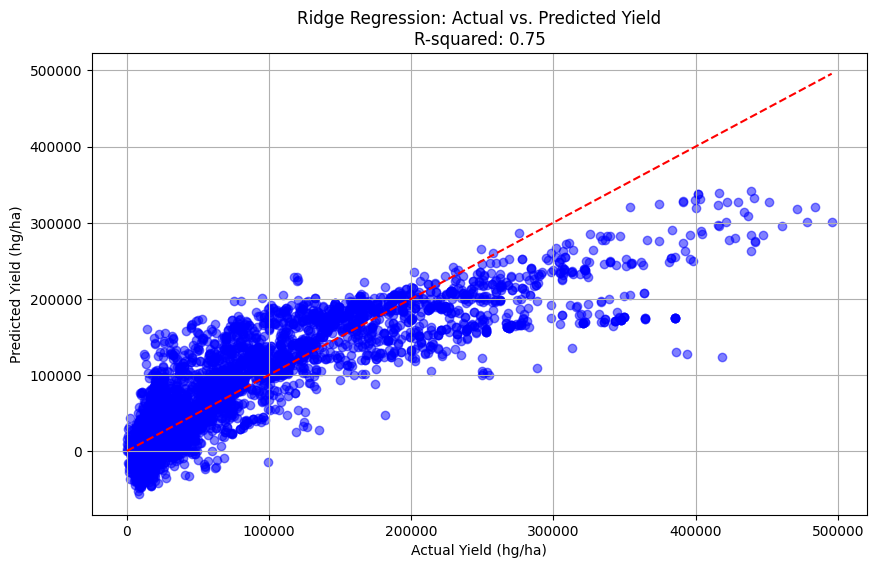

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Ridge Regression model
ridge = Ridge()
ridge.fit(X_train_dummy, y_train)
y_pred_ridge = ridge.predict(X_test_dummy)

# Calculate R-squared score
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Ridge Regression: Actual vs. Predicted Yield\nR-squared: {r2_ridge:.2f}')
plt.grid(True)
plt.show()


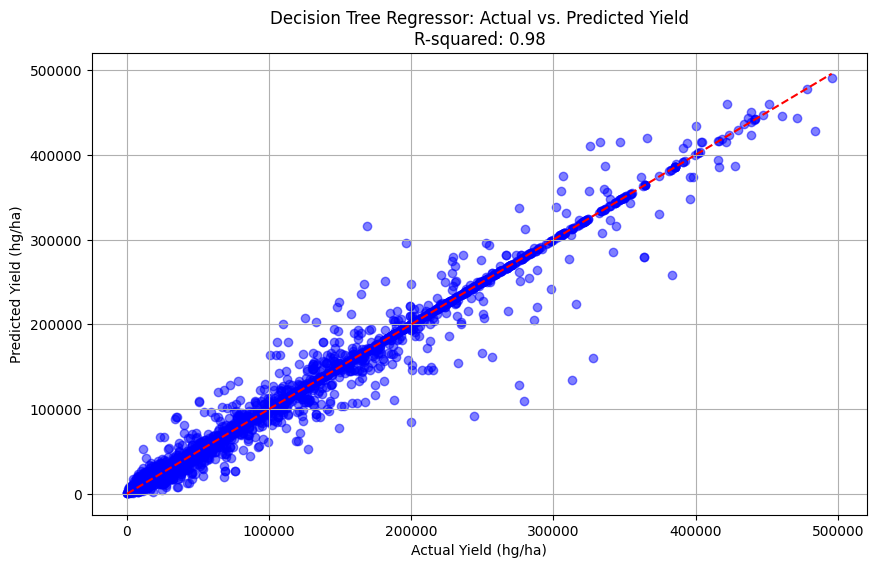

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize Decision Tree Regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy, y_train)
y_pred_dtr = dtr.predict(X_test_dummy)

# Calculate R-squared score
r2_dtr = r2_score(y_test, y_pred_dtr)

# Plotting actual vs predicted yields
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title(f'Decision Tree Regressor: Actual vs. Predicted Yield\nR-squared: {r2_dtr:.2f}')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


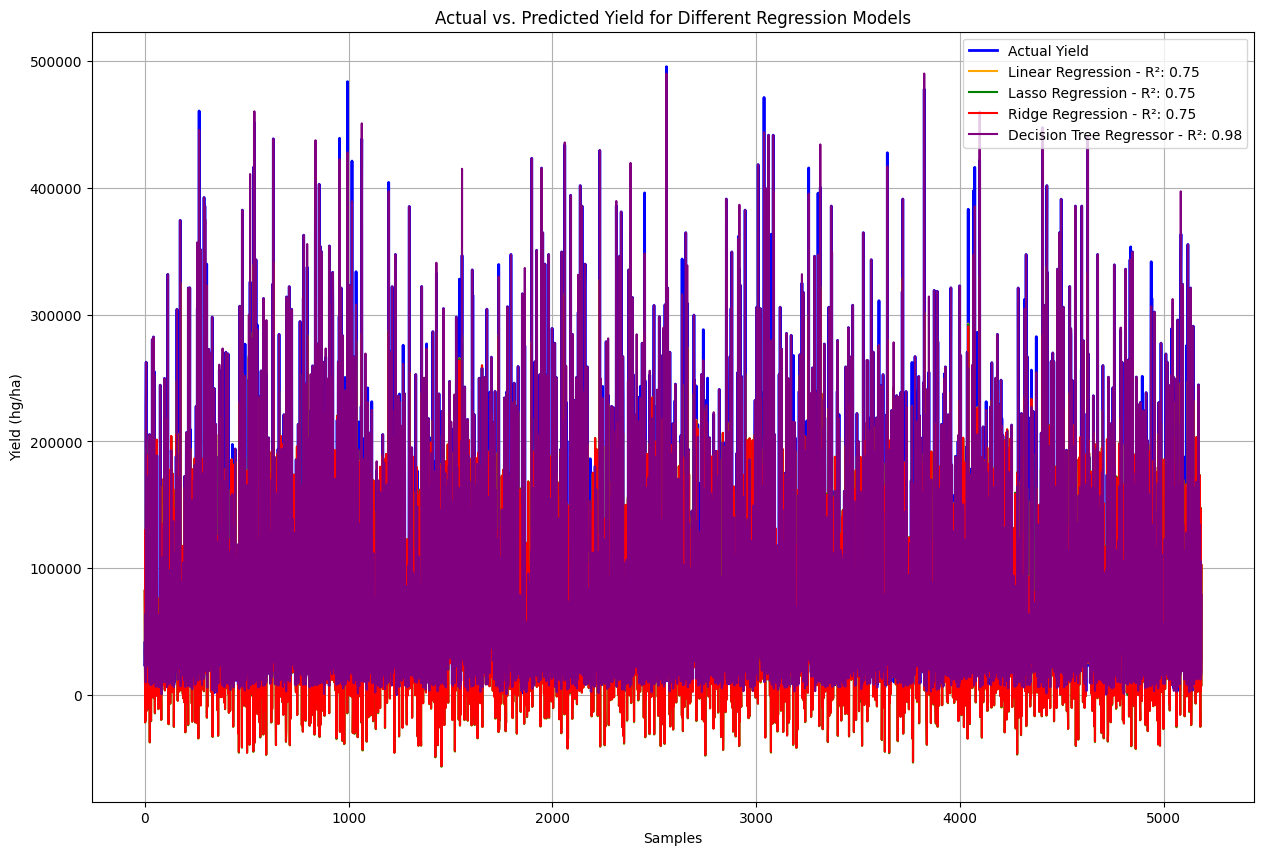

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

# Fit models and predict
predictions = {}
r2_scores = {}
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    predictions[name] = y_pred
    r2_scores[name] = r2_score(y_test, y_pred)

# Plotting actual vs predicted yields for all models
plt.figure(figsize=(15, 10))
plt.plot(y_test.reset_index(drop=True), label='Actual Yield', color='blue', linewidth=2)

colors = ['orange', 'green', 'red', 'purple']
for (name, y_pred), color in zip(predictions.items(), colors):
    plt.plot(y_pred, label=f'{name} - R²: {r2_scores[name]:.2f}', color=color)

plt.xlabel('Samples')
plt.ylabel('Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield for Different Regression Models')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Linear Regression R-squared: 0.75
Lasso Regression R-squared: 0.75
Ridge Regression R-squared: 0.75
Voting Regressor R-squared: 0.75


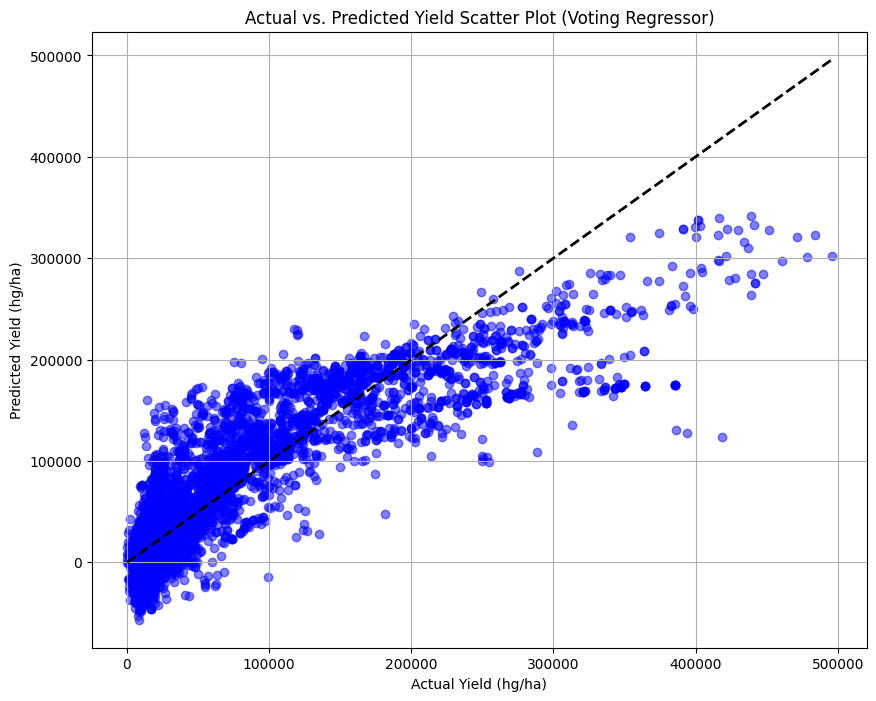

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

# Fit models on training data
lr.fit(X_train_dummy, y_train)
lasso.fit(X_train_dummy, y_train)
ridge.fit(X_train_dummy, y_train)

# Predictions from individual models
y_pred_lr = lr.predict(X_test_dummy)
y_pred_lasso = lasso.predict(X_test_dummy)
y_pred_ridge = ridge.predict(X_test_dummy)

# Calculate R-squared scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('lasso', lasso),
    ('ridge', ridge)
])

# Fit Voting Regressor on training data
voting_regressor.fit(X_train_dummy, y_train)

# Predict with Voting Regressor
y_pred_voting = voting_regressor.predict(X_test_dummy)

# Calculate R-squared score for Voting Regressor
r2_voting = r2_score(y_test, y_pred_voting)

# Print R-squared scores for individual models
print(f"Linear Regression R-squared: {r2_lr:.2f}")
print(f"Lasso Regression R-squared: {r2_lasso:.2f}")
print(f"Ridge Regression R-squared: {r2_ridge:.2f}")
print(f"Voting Regressor R-squared: {r2_voting:.2f}")

# Plotting actual vs predicted yields for Voting Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_voting, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Voting Regressor)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


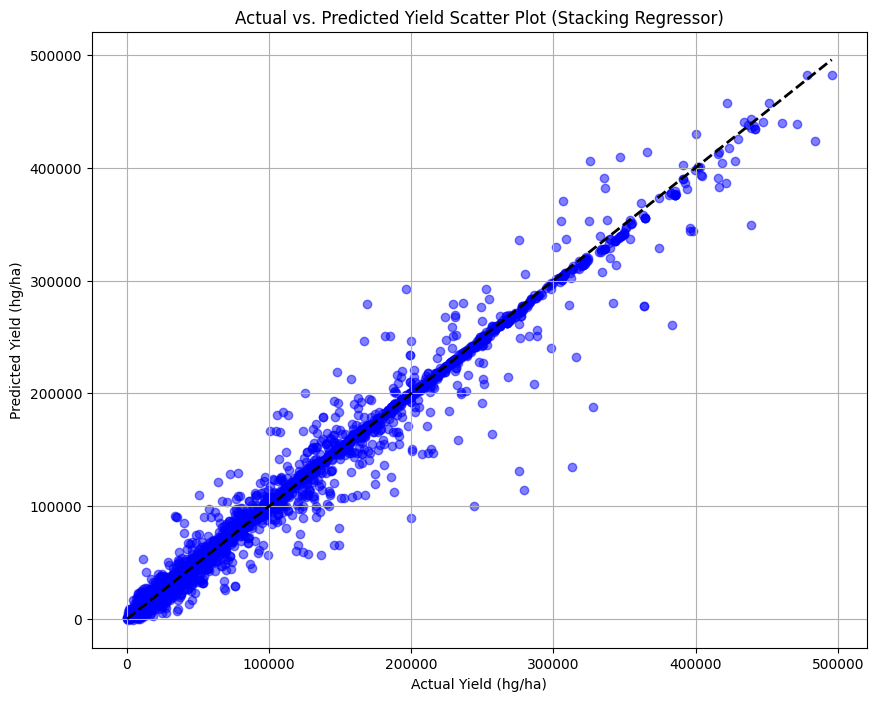

In [76]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Plotting actual vs predicted yields for Stacking Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79181665108.27734, tolerance: 11860167124.142298
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899714802401.0352, tolerance: 11965623646.077934
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Conve

Stacking Regressor R-squared: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


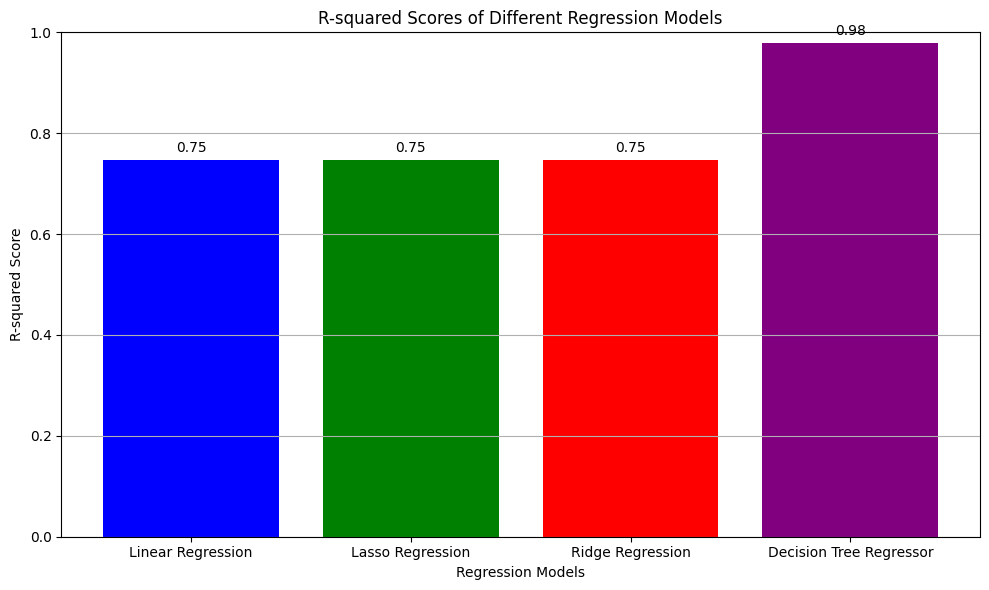

In [79]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize base models
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso()),
    ('ridge', Ridge()),
    ('dtr', DecisionTreeRegressor())
]

# Meta-model (final estimator)
meta_model = LinearRegression()

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit stacking regressor on training data
stacking_regressor.fit(X_train_dummy, y_train)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate R-squared score for stacking regressor
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print R-squared score for stacking regressor
print(f"Stacking Regressor R-squared: {r2_stacking:.2f}")

# Calculate R-squared scores for individual models
r2_scores = {}
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor']
for model_name, model in zip(models, [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor()]):
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    r2_scores[model_name] = r2_score(y_test, y_pred)

# Plotting R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Regression Models')
plt.ylim(0, 1)  # Assuming R-squared values are between 0 and 1
plt.grid(axis='y')

# Display the value of each bar on top
for index, value in enumerate(r2_scores.values()):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit stacking regressor on training data (already done in previous code)

# Predict with stacking regressor
y_pred_stacking = stacking_regressor.predict(X_test_dummy)

# Calculate evaluation metrics
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Print evaluation metrics for stacking regressor
print(f"Stacking Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_stacking:.2f}")
print(f"Mean Squared Error (MSE): {mse_stacking:.2f}")
print(f"R-squared Score: {r2_stacking:.2f}")


Stacking Regressor Metrics:
Mean Absolute Error (MAE): 4897.95
Mean Squared Error (MSE): 143162883.57
R-squared Score: 0.98


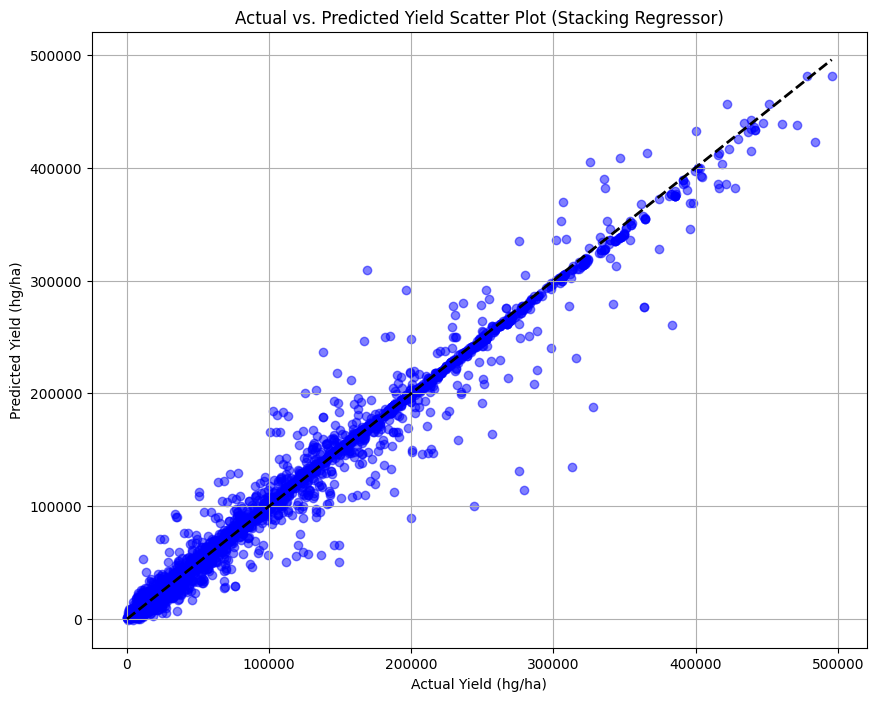

In [81]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted yields for Stacking Regressor
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_stacking, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Yield (hg/ha)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.title('Actual vs. Predicted Yield Scatter Plot (Stacking Regressor)')
plt.grid(True)
plt.show()
